# EFSA_study
## A hypothetical toxicological in-vivo experiment

_Gugliemo Cassini, Alessandro Capici e Andrea Prati_


### Problem presentation
A substance X was adiministered to laboratory animals and three endopoint (1, 2 and 3) were measured. Eight groups of animals were tested, 4 groups of males and 4 groups of females.

For each gender, one group was used as a control and each remaining group received one of three doses of substance X (30 mg/kg, 100 mg/kg and 150 mg/kg, administered to each animal daily).
### The goal
It is requested to propose an appropriate statistical model and to analyse these data.

#### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import xlrd
import time
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import funzioni as fn

# Data visualization
Here the dataset

sex: 1 = female  
sex: 0 = male

In [3]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


## Plot dose-response - request n°1

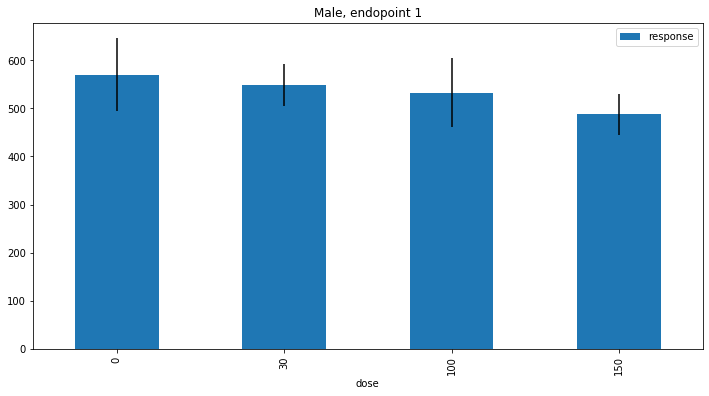

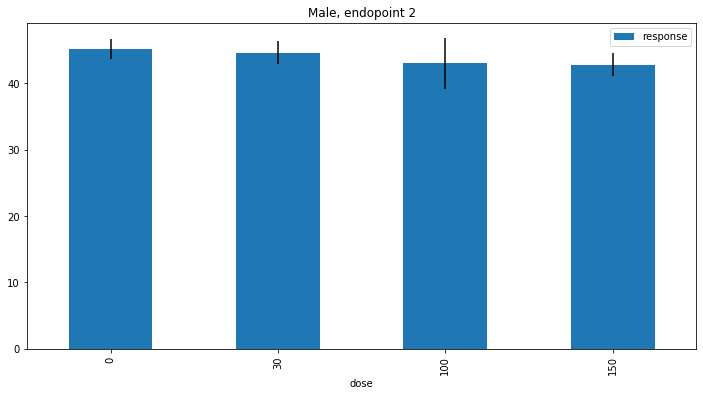

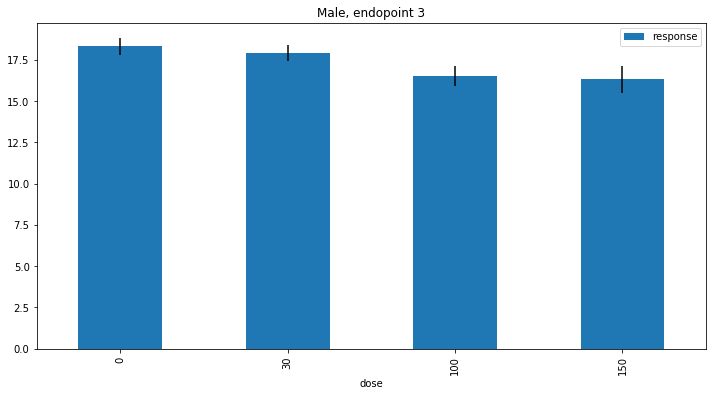

In [4]:
# aggiungere titoli
male_data=data[data.sex==0]

male_data_1=male_data[male_data.endpoint==1]
male_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 1")


male_data_2=male_data[male_data.endpoint==2]
male_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 2")

male_data_3=male_data[male_data.endpoint==3]
male_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 3")

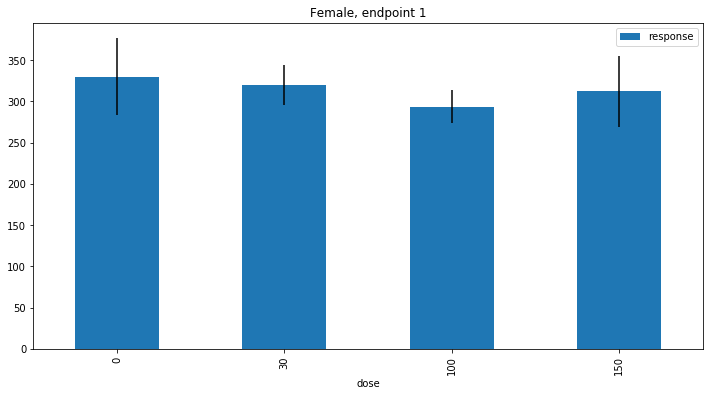

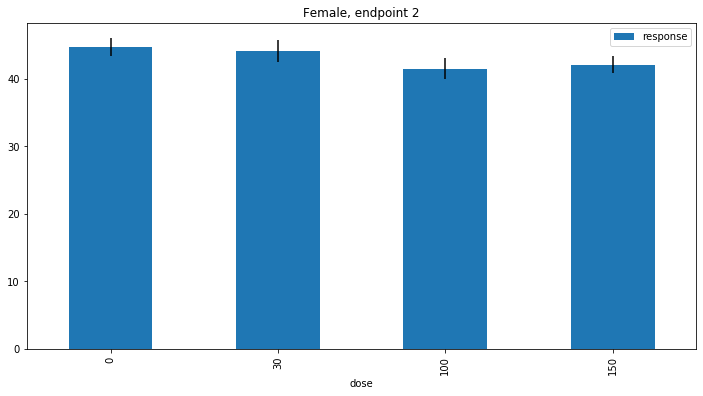

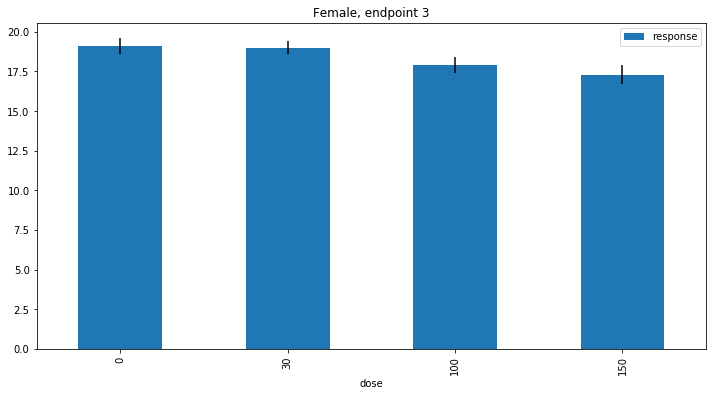

In [5]:
female_data=data[data.sex==1]

female_data_1=female_data[female_data.endpoint==1]
female_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 1")

female_data_2=female_data[female_data.endpoint==2]
female_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 2")

female_data_3=female_data[female_data.endpoint==3]
female_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 3")

# Model computing

In [79]:
data_Endpoint1 = data[data.endpoint == 1]
data_Endpoint2 = data[data.endpoint == 2]
data_Endpoint3 = data[data.endpoint == 3]

## Request n°2

### Endpoint 1

In [80]:
Y= data_Endpoint1.response
weights = data_Endpoint1.SD
X = data_Endpoint1.drop(columns=["response", "SD", "endpoint"])

display(X.shape)
display(Y.shape)

display(X)
display(Y)

(8, 3)

(8,)

,number of animals,dose,sex
0,9,0,0
1,10,30,0
2,10,100,0
3,9,150,0
4,10,0,1
5,10,30,1
6,10,100,1
7,10,150,1


0    570.4
1    548.5
2    533.0
3    488.1
4    329.8
5    319.7
6    293.3
7    312.4
Name: response, dtype: float64

__COMMENTO__

In [78]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

KeyboardInterrupt: 

In [69]:
group_of_models_endpoint1 = fn.mainForward(X, Y, weights)
#display(group_of_models_endpoint1)

Processed  20 models on 1 predictors in 0.10993790626525879 seconds.
Processed  19 models on 2 predictors in 0.09794211387634277 seconds.
Processed  18 models on 3 predictors in 0.07295846939086914 seconds.
Processed  17 models on 4 predictors in 0.08695030212402344 seconds.
Processed  16 models on 5 predictors in 0.06296563148498535 seconds.
Processed  15 models on 6 predictors in 0.053968191146850586 seconds.
Processed  14 models on 7 predictors in 0.07595658302307129 seconds.
Processed  13 models on 8 predictors in 0.05296969413757324 seconds.
Processed  12 models on 9 predictors in 0.046973466873168945 seconds.
Processed  11 models on 10 predictors in 0.04897141456604004 seconds.
Processed  10 models on 11 predictors in 0.04697275161743164 seconds.
Processed  9 models on 12 predictors in 0.0379796028137207 seconds.
Processed  8 models on 13 predictors in 0.028984546661376953 seconds.
Processed  7 models on 14 predictors in 0.03897881507873535 seconds.
Processed  6 models on 15 pred

### Endpoint 2

In [37]:
Y = data_Endpoint2.response
weights = data_Endpoint2.SD
X = data_Endpoint2.drop(columns=["response", "SD", "endpoint"])

In [38]:
X = X.reset_index()
Y = Y.reset_index()

In [39]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [40]:
group_of_models_endpoint2 = fn.mainForward(X, Y, weights)
display(group_of_models_endpoint2)

TypeError: reduction operation 'argmin' not allowed for this dtype

### Endpoint 3

In [81]:
Y= data_Endpoint3.response
weights = data_Endpoint3.SD
X = data_Endpoint3.drop(columns=["response", "SD", "endpoint"])

display(X.shape)
display(Y.shape)

display(Y)
display(X)

(8, 3)

(8,)

16    18.3
17    17.9
18    16.5
19    16.3
20    19.1
21    19.0
22    17.9
23    17.3
Name: response, dtype: float64

,number of animals,dose,sex
16,9,0,0
17,10,30,0
18,10,100,0
19,9,150,0
20,10,0,1
21,10,30,1
22,10,100,1
23,10,150,1


In [82]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

display(X.shape)
display(Y.shape)

(8, 20)

(8,)

In [65]:
group_of_models_endpoint3 = fn.mainForward(X, Y, weights)
display(group_of_models_endpoint3)

TypeError: reduction operation 'argmin' not allowed for this dtype

## Request n°3